# **Introduction**

Single qubit circuits are important to learn because they form the basic building blocks of quantum circuits. Many quantum algorithms and quantum applications use single qubit gates and circuits as components in more complex circuits.

Single qubit circuits are also useful for understanding the fundamental principles of quantum mechanics, such as superposition and entanglement. By studying single qubit circuits, we can gain an intuition for how quantum systems behave and how they can be manipulated to perform quantum operations.

In addition, single qubit circuits are often used in quantum error correction and fault tolerance. In these applications, single qubit gates and circuits are used to correct errors and maintain the integrity of the quantum state.

Overall, understanding single qubit circuits is a crucial step towards understanding more complex quantum circuits and quantum algorithms, and is essential for developing practical quantum technologies.

In this tutorial, we will learn about simple single qubit circuits in Qiskit, how to apply single qubit rotations, and how to represent the state vector of single qubits on the Bloch sphere. We will start by creating a single qubit circuit and adding gates to it. Then, we will run the circuit and see what the output is. We will use a simulator backend to get the statevector of the qubit after running the circuit, and we will visualize the statevector on the Bloch sphere. Finally, we will apply a rotation gate to the qubit, run the circuit again, and visualize the new statevector on the Bloch sphere. This tutorial will provide a basic introduction to single qubit circuits and rotations in Qiskit, and will help you understand how to visualize quantum states using the Bloch sphere.


First let us install qislit...

In [2]:
#!pip install qiskit qiskit-aer
#!pip install qiskit[visualization]
#!pip install qiskit_aer

...and import relevant libraries for math, to create quantum circuits and visualizing ket vectors.

In [3]:
import qiskit
print(qiskit.__version__)

import numpy as np
import math
from math import pi
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.primitives import BackendSampler, StatevectorSampler, StatevectorEstimator
from qiskit_aer import Aer
from qiskit.circuit.library import UnitaryGate

1.0.1


**Exercise 1:** Create a quantum circuit object with one qubit using QuantumCircuit. Initialize the qubit to the state you want using the method "initialize". Apply an Hadamard to the qubit, followed by a $\pi/4$ phase shift. Draw the circuit.

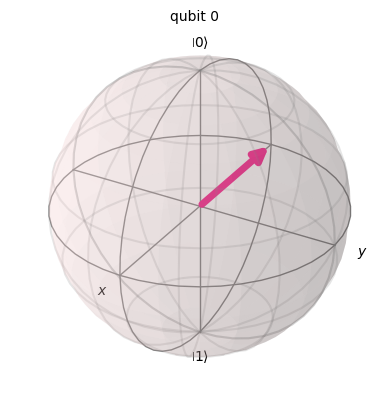

In [4]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)
# qc.initialize([[0,1j],[1,0]], normalize = True) when qc has 2 qubits
qc.initialize([0,1], normalize = True)
qc.h(qubit = 0)
#qc.p(theta = np.pi/4 , qubit = 0)
qc.draw('mpl')
plot_bloch_multivector(qc)

**Exercise 2:** Use the statevector simulator (linear algebra of the states and the unitaries) to simulate the output of the circuit. Initialize the circuit to different initial states. Print the state of the qubit as a vector (using the statevector function) and represent it on the Bloch sphere (plot_bloch_multivector). Try this for different initial vectors.

Statevector([ 7.07106781e-01+0.j        , -4.32978028e-17-0.70710678j],
            dims=(2,))


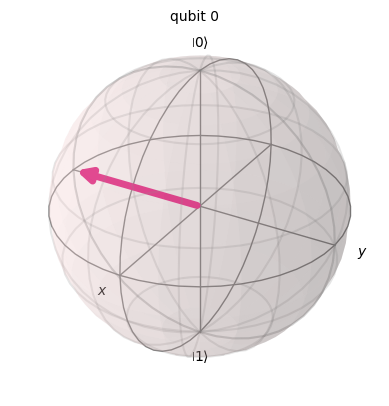

In [5]:
# Simulate the circuit using the statevector simulator

qc1 = QuantumCircuit(1)
qc1.initialize([0,1], normalize = True)
qc1.h(qubit = 0)
qc1.p(theta = np.pi/2 , qubit = 0)
qc1.draw('mpl')

print(Statevector(qc1))
plot_bloch_multivector(qc1)


**Exercise 3:** Add a measurement at the end of the circuit, redraw the circuit and represent the measurement result. Comment on the added channel.

In [6]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

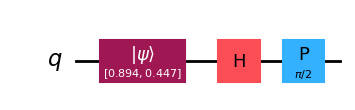

In [7]:
# Simulate the circuit using the statevector simulator
qc1 = QuantumCircuit(1)
qc1.initialize([2,1], normalize = True)
qc1.h(qubit = 0)
qc1.p(theta = np.pi/2 , qubit = 0)
## qc1.measure_all() no measuring here!!

qc1.draw('mpl')


{'0': 0.9, '1': 0.1}


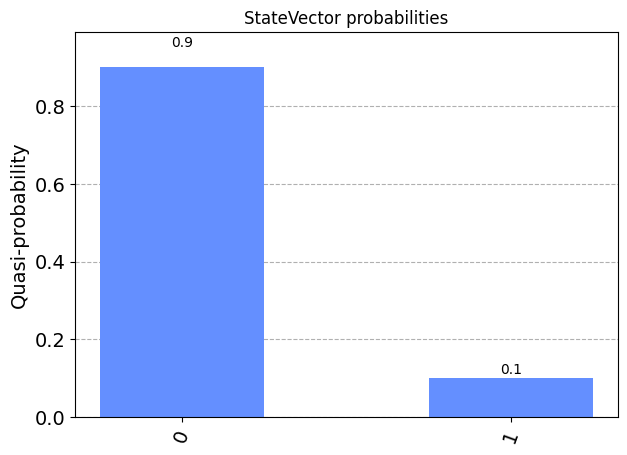

In [8]:
simulator = Aer.get_backend('statevector_simulator')

circ = transpile(qc1, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='StateVector probabilities')

In [9]:
## now a proper circuit, run on a quantum simulator aer

qc1 = QuantumCircuit(2)
qc1.initialize([1,1,1,1], normalize = True)
qc1.h(qubit = 0)
qc1.p(theta = np.pi/2 , qubit = 0)
qc1.measure_all()
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc1, simulator)


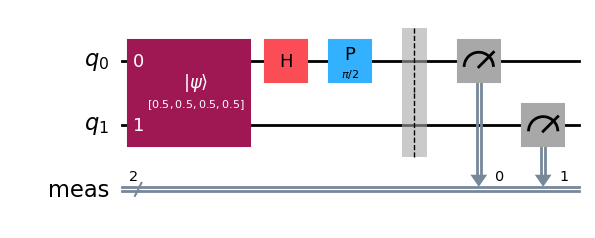

In [10]:
circ.draw('mpl')

{'00': 504, '10': 520}


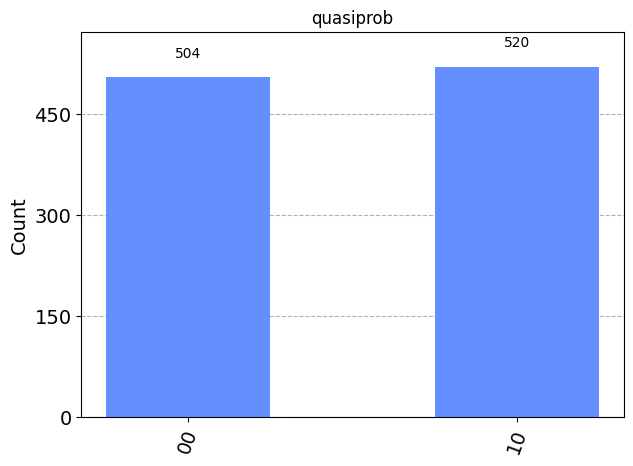

In [11]:

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts, title='quasiprob')

**Exercise 4:** Use the UnitaryGate function to add unitary transformations defined by matrices to a new circuit. Input azimutal and zenithal rotations of arbitrary angles.

In [31]:
X = np.matrix([[0, 1],[1, 0]])
Y = np.matrix([[0, -1j],[1j, 0]])
Z = np.diag([1,-1])

**Exercise 5:** Calculate by hand $\hat{X}\hat{X}$, $\hat{Y}\hat{Y}$ and $\hat{Z}\hat{Z}$. Use this result to calculate $e^{i \eta \hat{Z}/2}$ and apply it to a new quantum circuit after an Hadamard tranformation. What is the gate doing? DO the same for $e^{i \eta \hat{X}/2}$ and $e^{i \eta \hat{Y}/2}$

In [33]:
Y @ Y

matrix([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]])

In quantum mechanics, a mixed state is a statistical ensemble of quantum states. It can be represented by a density matrix, which is a Hermitian matrix that describes the statistical properties of the system. A mixed state can be created by taking a weighted sum of pure states, where the weights represent the probabilities of each state.

To create a mixed state in Qiskit, we can use density matrices. A density matrix is a matrix representation of a mixed state, where each element represents the probability amplitude of a particular state. To create a density matrix, we can use the qiskit.quantum_info.DensityMatrix class.

**Exercise 7:** Use density matrices to input and represent mixed states of two pure states. **Hint:** We can use the DensityMatrix.from_instruction method to create a density matrix of a pure state from a circuit

Try the above with mixed states of more than 2 pure states. Mixed states live in the inside of the Bloch sphere: why?

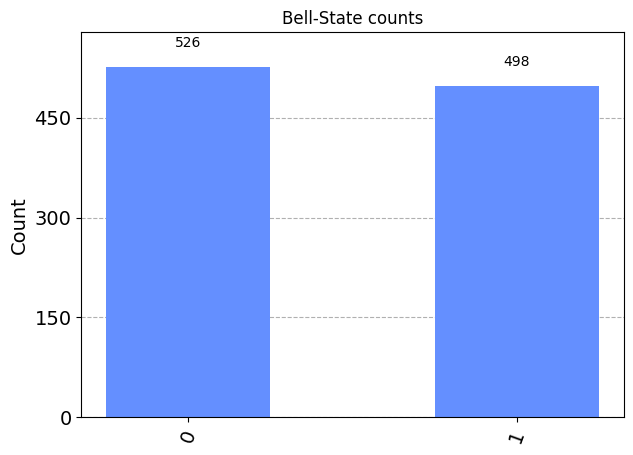

In [134]:
# Create circuit
circ = QuantumCircuit(1)
circ.h(0)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

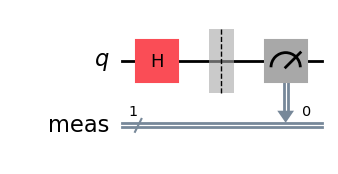

In [109]:
circ.draw('mpl')